This project was completed by 
### Alia Abboud and Oleksandra Plyska,
here in partial fulfilment of ECON-UB.0232, Data Bootcamp, Spring 2018. We certify that the NYU Stern Honor Code applies to this project.
In particular, we have:
Clearly acknowledged the work and efforts of others when submitting written work as our own.
The incorporation of the work of others–including but not limited to their ideas, data, creative
expression, and direct quotations (which should be designated with quotation marks), or paraphrasing
thereof– has been fully and appropriately referenced using notations both in the text
and the bibliography.
And we understand that:
Submitting the same or substantially similar work in multiple courses, either in the same semester
or in a different semester, without the express approval of all instructors is strictly forbidden.
We acknowledge that a failure to abide by NYU Stern Honor Code will result in a failing grade for
the project and course.
## Project Description
This project aims to study marital age in different countries. It does so by studying the relationship between marital age for females and different economic and social factors. The aim of this project is to see if the average age of when females get married in a country has an effect on or affected by other important socioeconomic variables like GDP, female unemployment, and female education. The data we have was obtained from the World Bank's website: https://data.worldbank.org/. The data is specific for the year 2011 as it is the most recent year with sufficient data. We use graphs and maps to present the results of thi data as well as some statistical measurement. Our data suggests a positive correlation between marital age and GDP and Female students, but a negative correlation between marital age and unemployed females. However, it also shows a weak correlation so the results are not reliable. Throughout this project, there will be some comentaries to further elaborate results and explain the process.

In [0]:
import pandas as pd
import requests
import numpy as np 
import matplotlib.pyplot as plt 
import requests, io      
import zipfile as zf            
import shutil                    
import os     

In [0]:
url1 = "https://raw.githubusercontent.com/ovp203/My_first_repository_/master/SMAM_data_2011.csv"
url2 = "https://raw.githubusercontent.com/ovp203/My_first_repository_/master/GDP_data_2011.csv"
url3 = "https://raw.githubusercontent.com/ovp203/My_first_repository_/master/unemployment_data_cleared.csv"
url5 = "https://raw.githubusercontent.com/ovp203/My_first_repository_/master/education_data.csv"
url6 = "https://raw.githubusercontent.com/ovp203/My_first_repository_/master/population_data1.csv"

GDPdata = pd.read_csv(url2)
SMAMdata = pd.read_csv(url1)
unemployment_data = pd.read_csv(url3)
EDUCATIONdata = pd.read_csv(url5)
popdata = pd.read_csv(url6)

After importing the data, we started cleaning it by removing the unwanted variables to make it easier to read

In [0]:
SMAMdata.drop(["ISO code"], axis=1, inplace = True)
SMAMdata.drop(["YearStart"], axis=1, inplace = True)
SMAMdata.drop(["YearEnd"], axis=1, inplace = True)
SMAMdata.drop(["Sex"], axis=1, inplace = True)
SMAMdata.drop(["DataProcess"], axis=1, inplace = True)
SMAMdata.drop(["DataCatalog ShortName"], axis=1, inplace = True)
SMAMdata.drop(["DataCatalog ID"], axis=1, inplace = True)
SMAMdata.drop(["DataCatalog LongName"], axis=1, inplace = True)
SMAMdata.drop(["Data Source"], axis=1, inplace = True)
SMAMdata.drop(["Note on Data"], axis=1, inplace = True)
SMAMdata.drop(["Note on Country and Population"], axis=1, inplace = True)

In [0]:
GDPdata.drop(["Country Code"], axis=1, inplace = True)
GDPdata.drop(["Indicator Name"], axis=1, inplace = True)
GDPdata.drop(["Indicator Code"], axis=1, inplace = True)

In [0]:
unemployment_data.drop(["Series"], axis=1, inplace = True)
unemployment_data.drop(["Country Code"], axis=1, inplace = True)
unemployment_data.drop(["VarName"], axis=1, inplace = True)

In [0]:
EDUCATIONdata.drop(["Country Code"], axis=1, inplace = True)
EDUCATIONdata.drop(["Indicator Code"], axis=1, inplace = True)
EDUCATIONdata.drop(["Indicator Name"], axis=1, inplace = True)

We then rename the variables to make it clearer:
1) Marital Age is the average age of a female when she first gets married in every country.
2) GDP is the GDP of the country
3) Unemployed females is the percentage of females who are unemployed from the total   females in the labor force.
4) Population is the population of each country.
5) Female students is the percentage of students in secondary education that are females


In [0]:
SMAMdata.rename(columns = {"DataValue": "Marital Age", "Country or area": "Country Name" }, inplace = True)
GDPdata.rename(columns = {"2011": "GDP"}, inplace = True)
unemployment_data.rename(columns = {"Value": "Unemployed Females"}, inplace = True)
popdata.rename(columns = {"2011": "Population"}, inplace = True)
EDUCATIONdata.rename(columns = {"2011": "Female Students"}, inplace = True)

Following, we merge all data sets together to get one big data set.

In [0]:
combo = pd.merge(SMAMdata,GDPdata,
                 on='Country Name',  
                 how='left',        
                 indicator=True)
 
combo3 = pd.merge(combo2, unemployment_data,
                 on= 'Country Name',
                 how = 'left')
combo3 = pd.merge(combo3, popdata,
                 on= 'Country Name',
                 how = 'left')
DataSet = pd.merge(combo3,EDUCATIONdata,
                  on= 'Country Name',
                  how= 'left')

In [0]:
DataSet.drop(["_merge"], axis=1, inplace = True)

Here we are making sure that all variables are floats so that we can round them to the nearest 1 decimal place

In [320]:
DataSet.dtypes 

Country Name           object
Marital Age           float64
GDP                   float64
LFPR                  float64
Unemployed Females    float64
Population            float64
Female Students       float64
dtype: object

Just viewing the data set to make sure we are good and proceed

In [321]:
DataSet.head()

,Country Name,Marital Age,GDP,LFPR,Unemployed Females,Population,Female Students
0,Albania,25.1,1.289087e+10,36.070000,13.750000,2.905195,47.347382
1,Armenia,24.6,1.014211e+10,31.430000,19.610001,2.875581,47.848419
2,Australia,29.9,1.390557e+12,67.470001,5.300000,22.340024,NaN
3,Austria,27.1,4.311203e+11,54.810001,4.580000,8.391643,47.758678
4,Bangladesh,18.6,1.286379e+11,NaN,NaN,153.911916,52.526081


We are rounding all the variables to 1 decimal place.

In [0]:
desred_decimals = 1
DataSet['Female Students'] = DataSet['Female Students'].apply(lambda x: round(x,desred_decimals))
DataSet['Unemployed Females'] = DataSet['Unemployed Females'].apply(lambda x: round(x,desred_decimals))

DataSet['Marital Age'] = DataSet['Marital Age'].apply(lambda x: round(x,desred_decimals))
DataSet['GDP'] = DataSet['GDP'].apply(lambda x: round(x,desred_decimals))

In [325]:
DataSet.head()

,Country Name,Marital Age,GDP,LFPR,Unemployed Females,Population,Female Students
0,Albania,25.1,1.289087e+10,36.070000,13.8,2.905195,47.3
1,Armenia,24.6,1.014211e+10,31.430000,19.6,2.875581,47.8
2,Australia,29.9,1.390557e+12,67.470001,5.3,22.340024,NaN
3,Austria,27.1,4.311203e+11,54.810001,4.6,8.391643,47.8
4,Bangladesh,18.6,1.286379e+11,NaN,NaN,153.911916,52.5


We then sort the values to be in ascending order of marital age to be able to plot the graph

In [0]:
DataSet = DataSet.sort_values(["Marital Age"], ascending=True, axis=0)


In [328]:
DataSet.corr()

,Marital Age,GDP,LFPR,Unemployed Females,Population,Female Students
Marital Age,1.000000,0.160481,0.273015,-0.116044,-0.257301,0.032460
GDP,0.160481,1.000000,0.269742,-0.125114,0.340039,-0.142043
LFPR,0.273015,0.269742,1.000000,-0.585635,-0.009165,-0.123991
Unemployed Females,-0.116044,-0.125114,-0.585635,1.000000,0.258407,0.056181
Population,-0.257301,0.340039,-0.009165,0.258407,1.000000,-0.194367
Female Students,0.032460,-0.142043,-0.123991,0.056181,-0.194367,1.000000


The above table shows the correlation between all variables. It is clear that marital age has a positive corelation with GDP and Female Students, as in the higher % of female students, the higher the age females get married. The higher the GDP, the higher the age of females when they get married.

The results also show that there is a negative correlation between the age when females get married and the % of unemployed females. This shows that the more unemployed females, the earlier females get married.

### This is a graph showing the relationship between unemployed females and marital age.


There is a really weak correlation between the variables. However, it is interesting to observe that some of the outliers have a high unemployment rate and, at the same time, high marital age. 

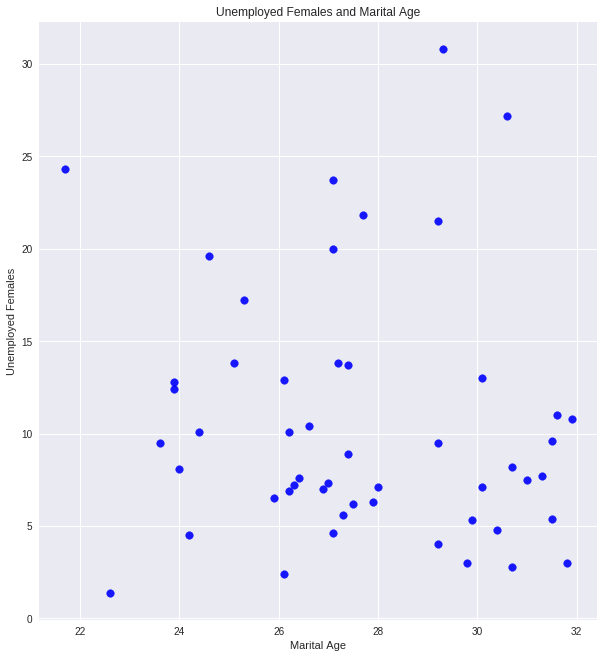

In [329]:
DataSet.plot.scatter(x="Marital Age", 
                y="Unemployed Females", 
                alpha=0.9, 
                title='Unemployed Females and Marital Age',
                s=60,
                figsize=(10, 11), 
                color = "blue")


### This is a graph between GDP and Marital Age.

The relationship seems no be not very significant, however, there  is a slight trend of some countries that have higher GDP to have a higher marital age.

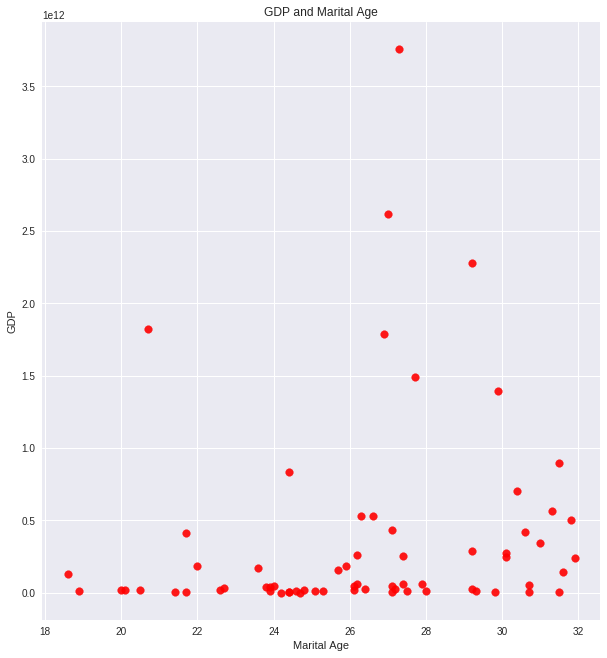

In [330]:
DataSet.plot.scatter(x="Marital Age", 
                y="GDP", 
                alpha=0.9, 
                title='GDP and Marital Age',
                s=60,
                figsize=(10, 11), 
                color = "red")


### This is a graph between Marital Age and Female students


The relationship between variable is rather weak overall, however, we can observe that in countries that have the lowest education rates the marital age is very low. 

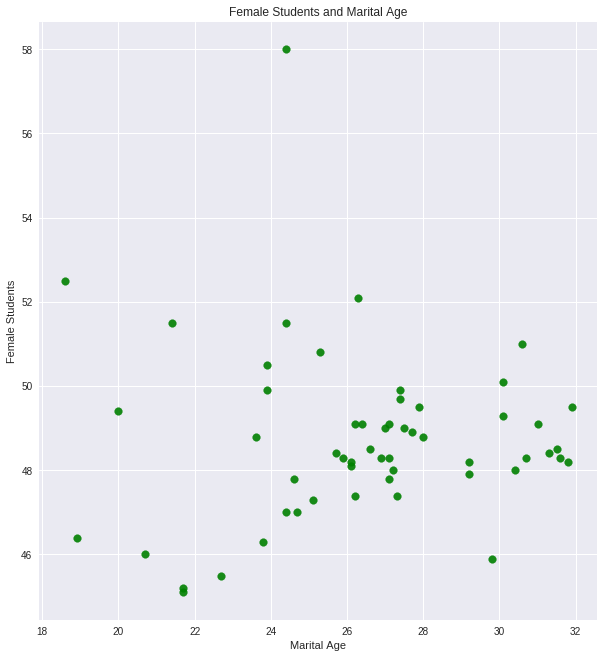

In [331]:
DataSet.plot.scatter(x="Marital Age", 
                y="Female Students", 
                alpha=0.9, 
                title='Female Students and Marital Age',
                s=60,
                figsize=(10, 11), 
                color = "green")


# Now we will demonstrate the relationship of GDP to the marital age on a plot given the size of the countries

We are setting the GDP as our x-axis and the marital age as y-axis. The size of the bubble correlate with the size of the countries, which gives us the idea about where the larger and smaller countries stand in relationship to the outliers. 

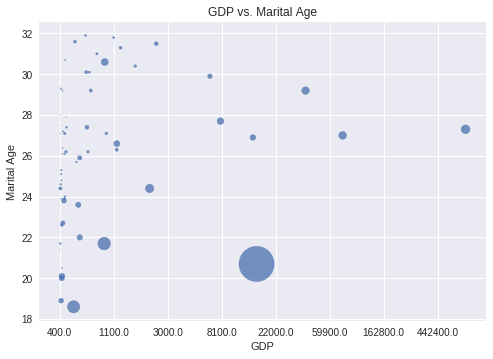

In [332]:
fig, ax = plt.subplots()

ax.scatter((DataSet["GDP"]), (DataSet["Marital Age"]), 
            s=DataSet['Population'], 
            alpha= 0.76) 


ax.set_title("GDP vs. Marital Age")
ax.set_ylabel("Marital Age") 
ax.set_xlabel("GDP")
xlabel_list = np.exp(range (5, 20)) 
xlabel_list = np.round(xlabel_list, -2) 


ax.set_xticklabels(xlabel_list)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("hc.png", bbox_inches="tight", dpi = 600)

plt.show()

### This is a bar chart of the top 8 countries with highest female marital age.
Montserrat is the highest with 31.9 as the average age, followed by Ireland and Norway.

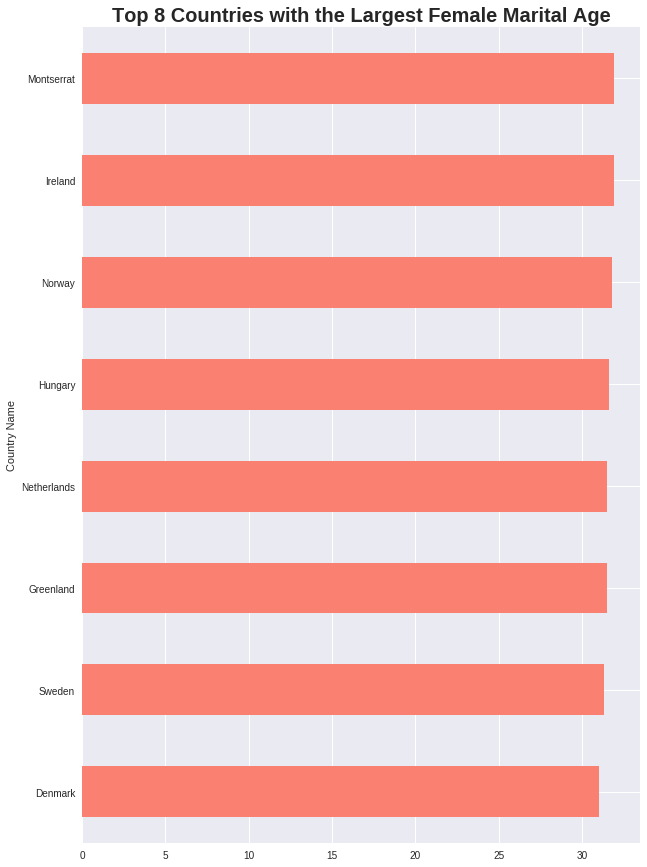

In [333]:
DataSet = DataSet.set_index("Country Name")
dsnew = DataSet.sort_values("Marital Age")
dsnew = DataSet["Marital Age"].tail(8)
dsnew.plot(kind="barh", figsize=(10, 15), color= "salmon")
plt.title("Top 8 Countries with the Largest Female Marital Age", fontsize=20,fontweight='bold')
plt.show()


### This bar chart shows the top 8 countries witht the lowest female marital age.
Bangladesh is country whose average female gets married the earliest with an average marital age of 18.6, followed by Mozambique and Nepal.

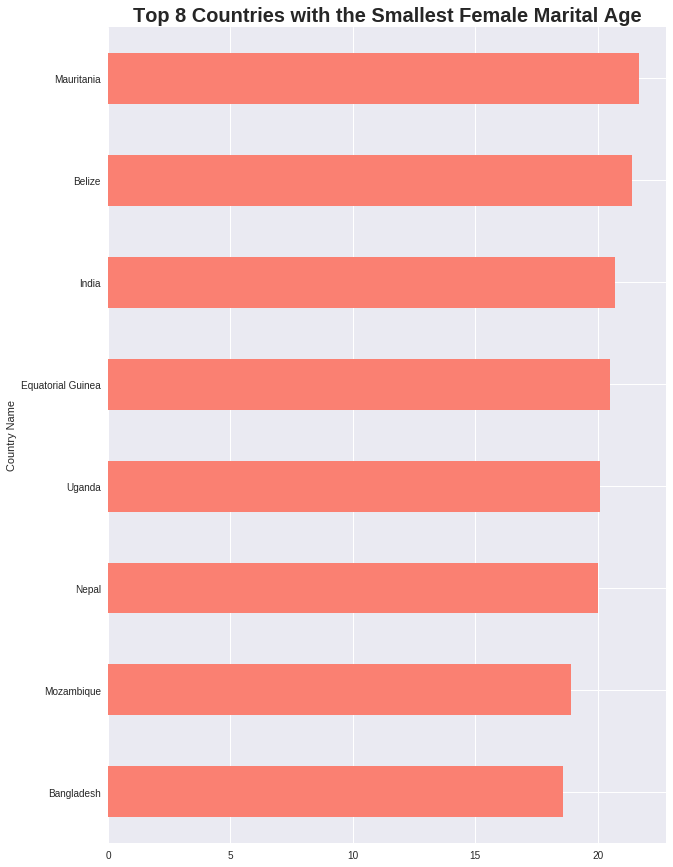

In [334]:
dsnew = DataSet.sort_values("Marital Age")
dsnew = DataSet["Marital Age"].head(8)
dsnew.plot(kind="barh", figsize=(10, 15), color= "salmon")
plt.title("Top 8 Countries with the Smallest Female Marital Age", fontsize=20,fontweight='bold')
plt.show()

# Mapping

In order to demonstrate on a map how the marital age varies not only across countries, but across regions of the world as well, we created a map. The lowest marital age correlates with the lightest color and the highest marital age with the darker accordingly. Due to the limited availability of the data for marital age, unfortunately, we are not able to abserve the colors for every country of the world. However, we can observe the general trends: in Australia, Greenland and most of the countries of Northern Europe the marital age is higher than average, while in countries with data for Africa, Asia and the Middle East it is lower. 

In [335]:
!pip install geopandas

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.rename(columns = {"name": "Country Name"}, inplace = True)

In [0]:
NEW = pd.merge(world, DataSet, on='Country Name')


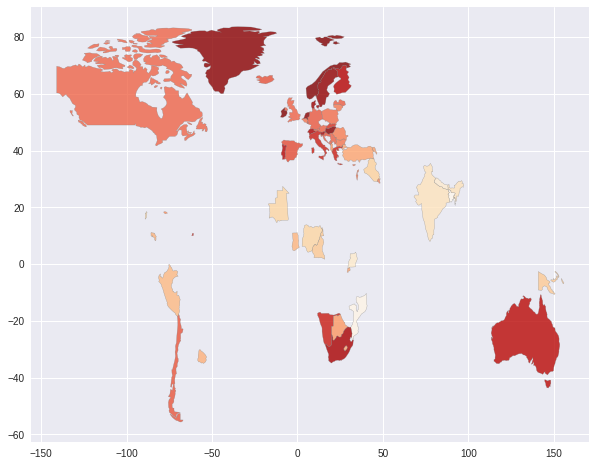

In [341]:
fig, ax = plt.subplots(figsize = (10,8))

NEW.plot(ax = ax, edgecolor='tab:grey',
             column='Marital Age', 
             cmap='OrRd', 
             alpha = 0.8)
plt.show()

# Conclusion

In conclusion, after running all these codes and getting the correlation, it seems that marital age is more culturally related and based by regions than dependent on other socioeconomic factors. Of course you may be able to link a correlation but as mentioned before it is a weak correlation.